<p style="font-size:300%; text-align:center"> king county housing price modeling</p>
<p style="font-size:150%; text-align:center"> Feature selection and validation</p>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
import statsmodels.api as sm
from statsmodels.formula.api import ols
plt.style.use('ggplot')

##  Read the clean normalized KC housing data

In [2]:
# load normalized data from the final model
kc_final = pd.read_csv('data/kc_house_final_model.csv')
# read back real price values from cleaned data
kc_clean = pd.read_csv('data/kc_house_selected.csv')

## comparison of real and predicted 

In [3]:

kc_real = kc_clean[['price']]
y_real_log = np.log(kc_real.iloc[:,0].values)

# read X to creat Y_predicted from X
kc_predict = kc_final
X_train = kc_predict.drop(['price'], axis =1 )

# Create OLS model and summary and constants 
ols_model = sm.OLS(y_real_log, sm.add_constant(X_train), hasconst= True)
model = ols_model.fit()
#train_results = model.summary()

y_pred = model.predict(sm.add_constant(X_train))


C:\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


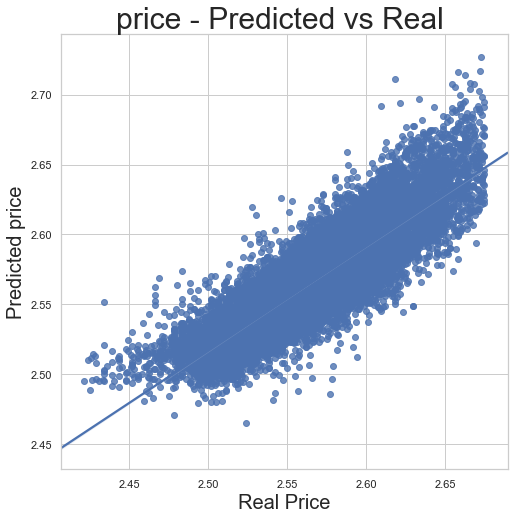

In [4]:
# Plot predicted values
sns.set(style="whitegrid")   
#fig, ax = plt.subplots(figsize=(8, 8))

plt.figure(figsize=(8,8))
plt.title('price - Predicted vs Real ',fontsize=30)
ax = sns.regplot(x=y_real_log, y=y_pred);
ax.set_xlabel('Real Price', fontsize=20)
ax.set_ylabel("Predicted price", fontsize=20)

plt.savefig('img/Pred_vs_real.png') # Save that figure
plt.show()


## Visualizing relationship of the "price" with final features 

In [10]:
kc_final.columns

Index(['price', 'lat', 'view', 'bedrooms', 'bathrooms', 'sqft_above',
       'sqft_living15', 'yr_built', 'grade', 'sqft_basement', 'condition',
       'floors', 'waterfront_1', 'zipcode', 'sqft_lot', 'long', 'is_renovated',
       'season_spring', 'season_winter'],
      dtype='object')

In [15]:
cols=['price', 'lat', 'view', 'bedrooms', 'bathrooms', 'sqft_above',
       'sqft_living15', 'yr_built', 'grade', 'sqft_basement', 'condition',
       'floors', 'waterfront', 'zipcode', 'sqft_lot', 'long', 'renovated',
       'season']

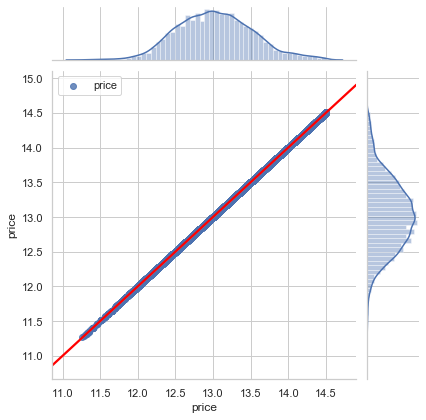

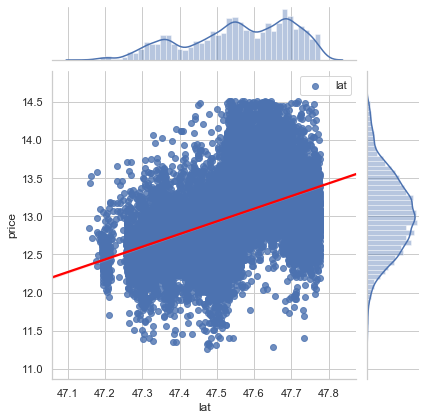

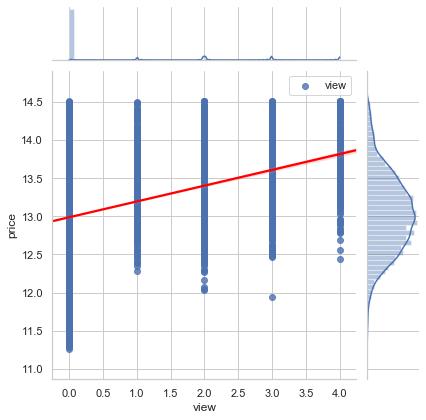

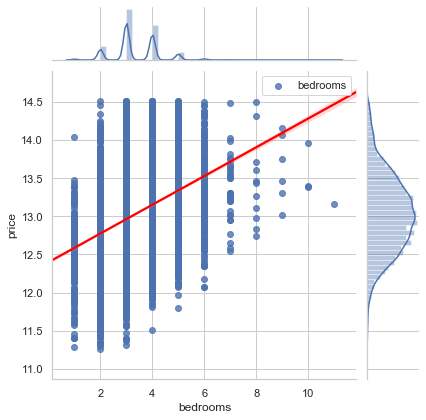

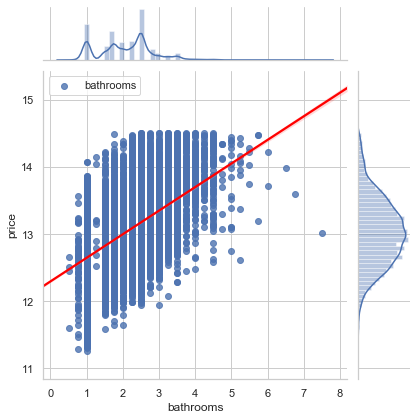

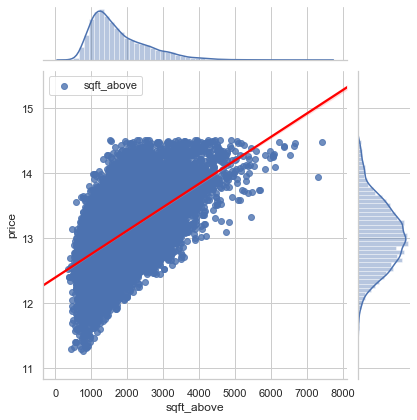

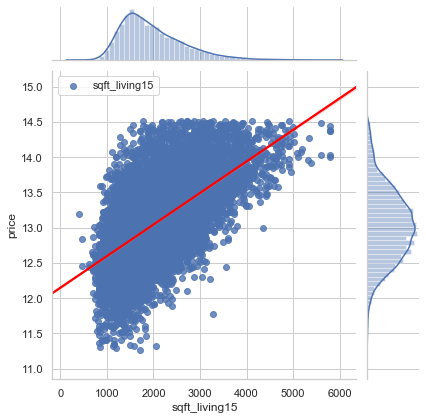

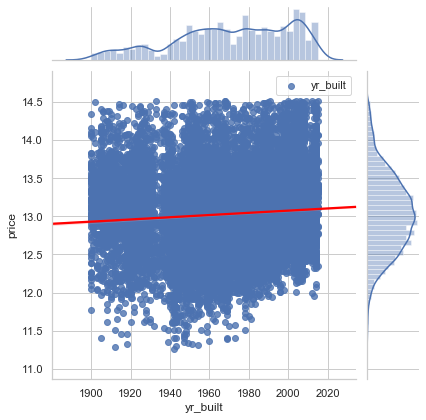

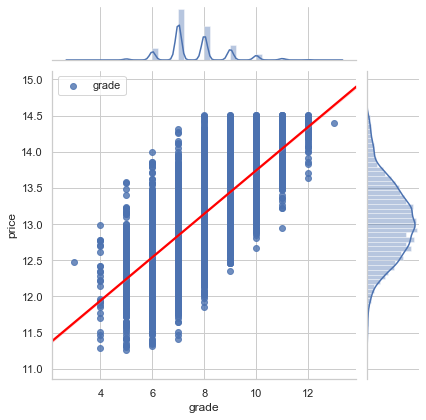

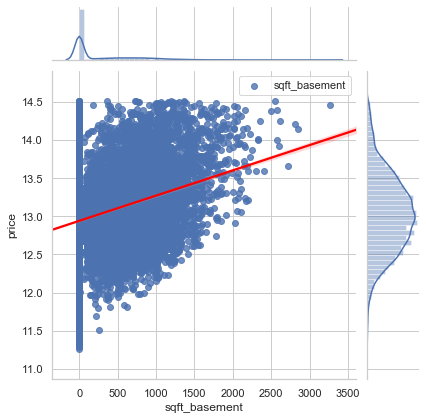

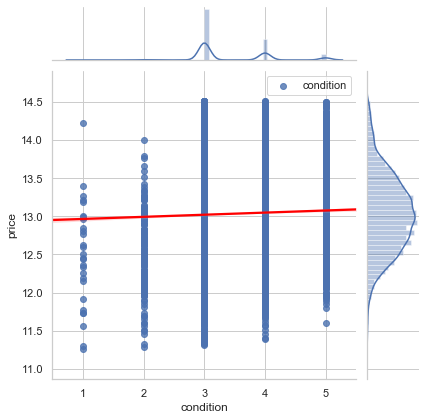

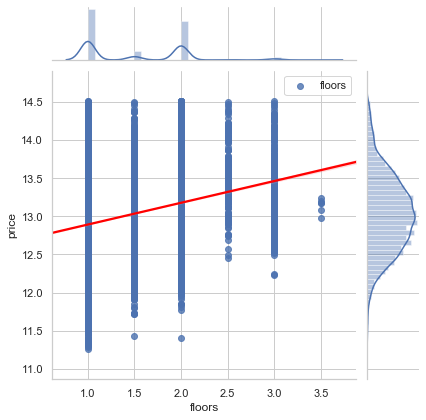

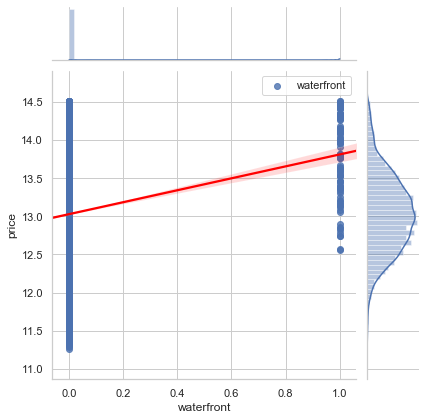

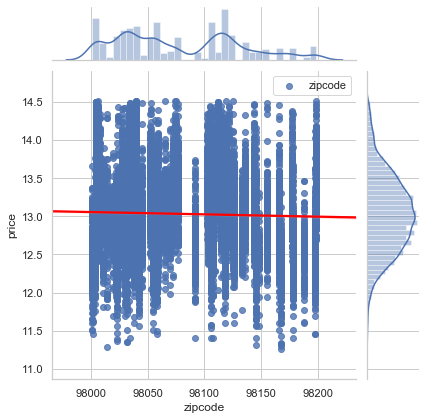

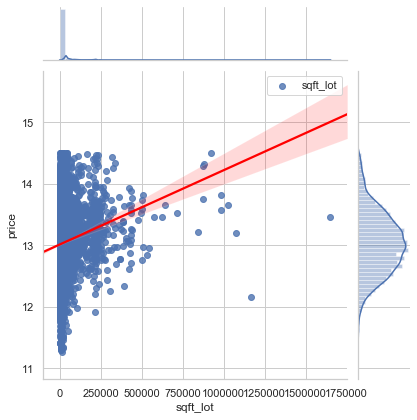

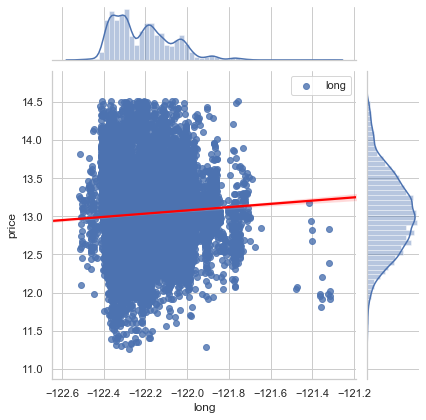

TypeError: can't multiply sequence by non-int of type 'float'

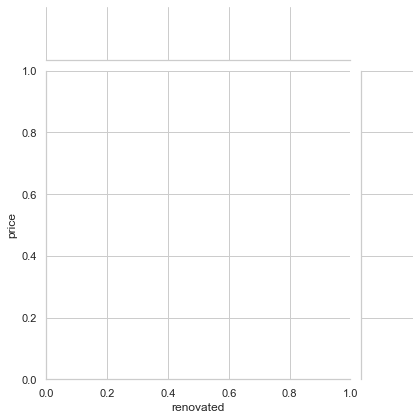

In [16]:
tmp_kc = kc_clean[cols]

headers=tmp_kc.columns

#once again just iterating through our list of columns so that we get each separate plot
for column in headers:
    sns.jointplot(x=column, y="price", #creating our joint plot as well as setting our columns to be predictors and price to be our target
                  data=tmp_kc, #we want the jointplots to be created using our df_price_log dataset
                  kind='reg', 
                  label=column, 
                  joint_kws={'line_kws':{'color':'red'}}) #stylistic choices

    plt.legend() #including a legend for our plots
    if column == 'grade':
        plt.savefig('img/grade_jointplot.png') # Save that figure
    plt.show()

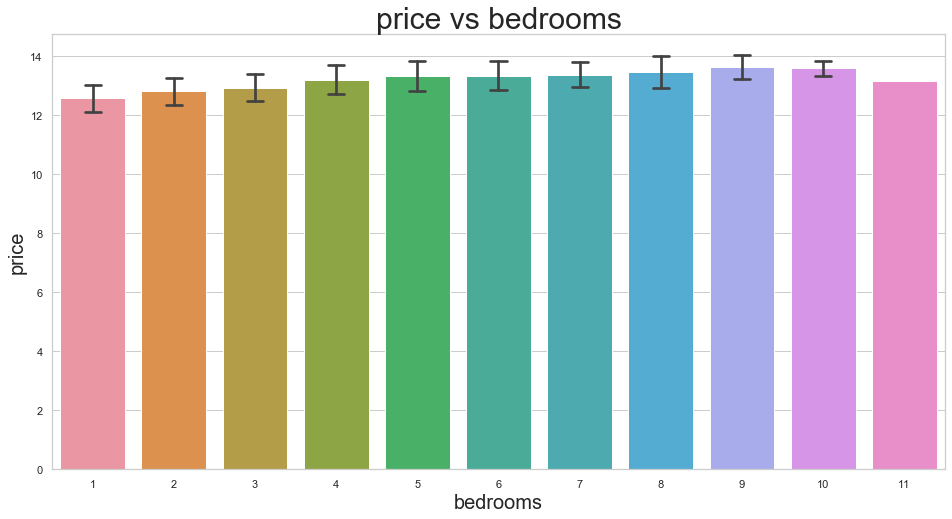

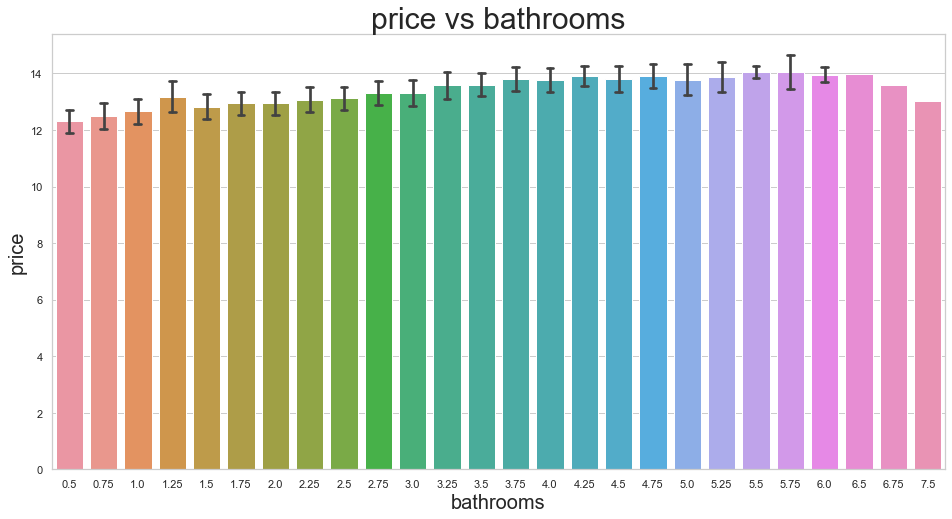

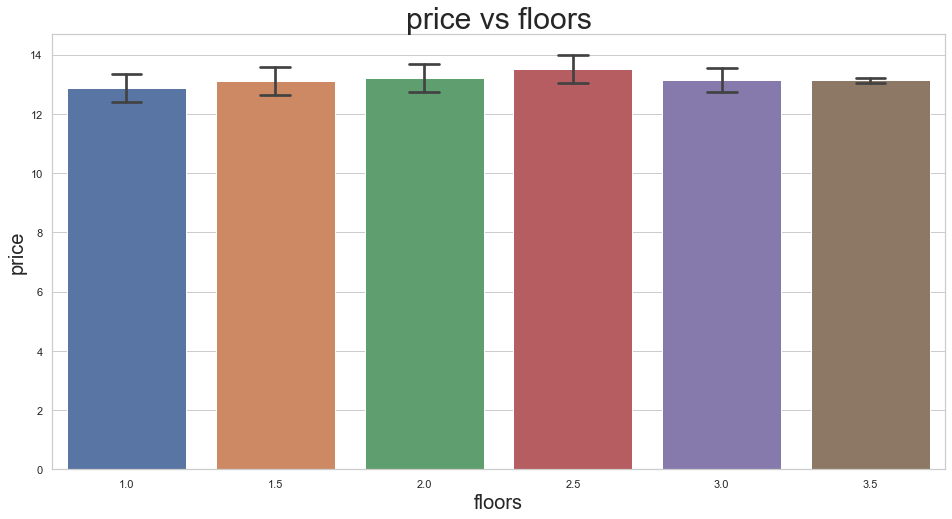

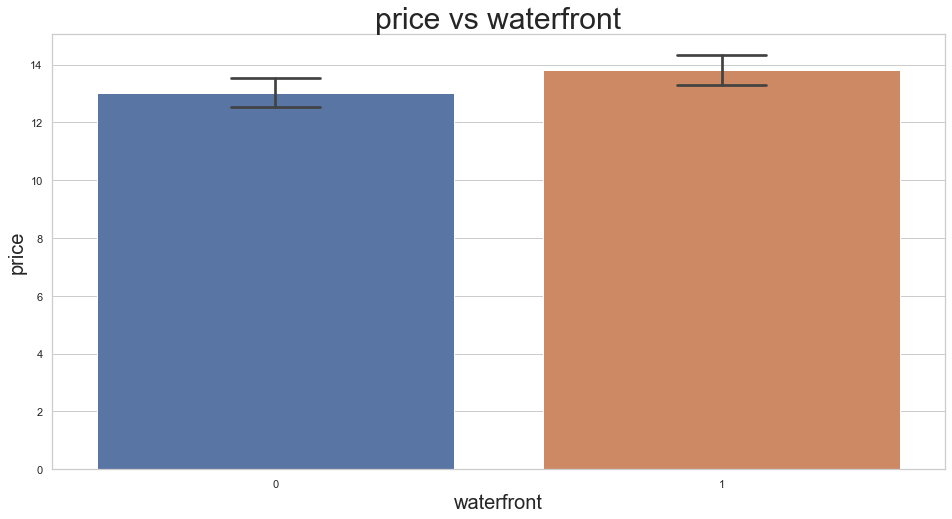

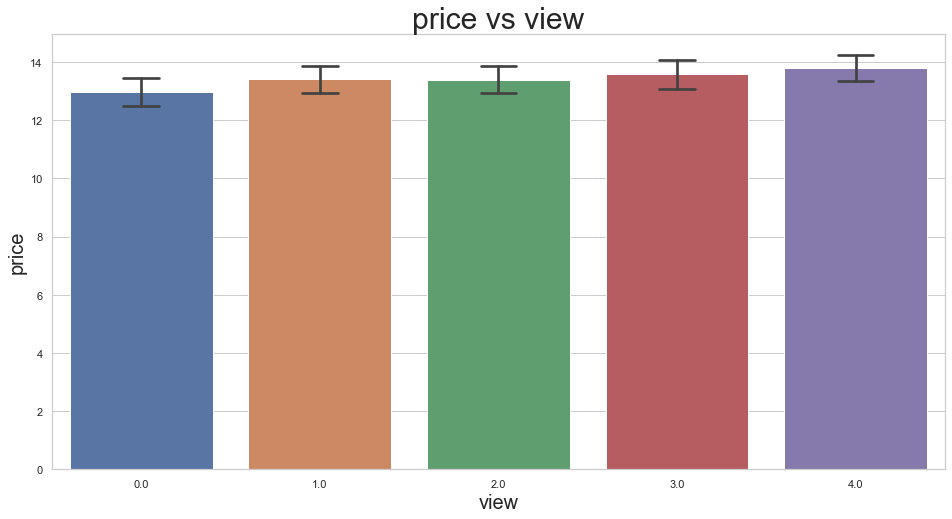

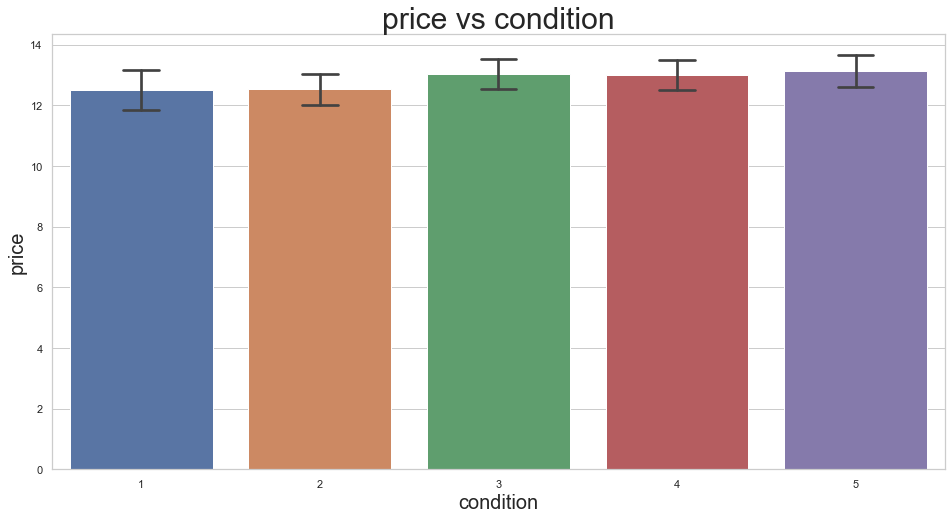

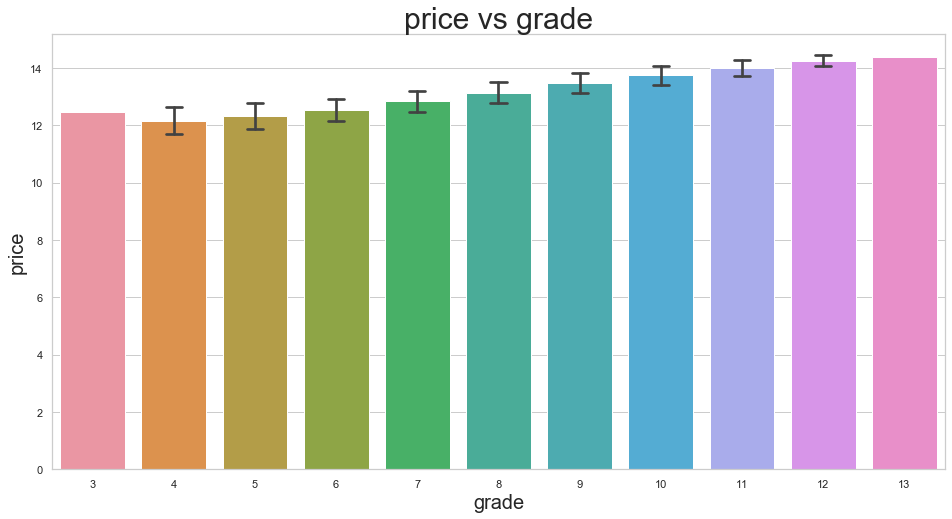

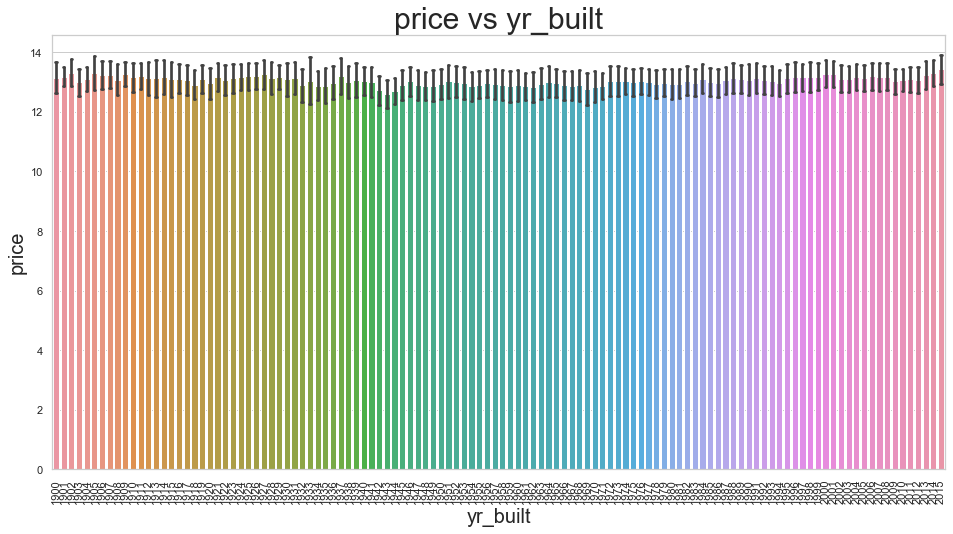

ValueError: Could not interpret input 'month'

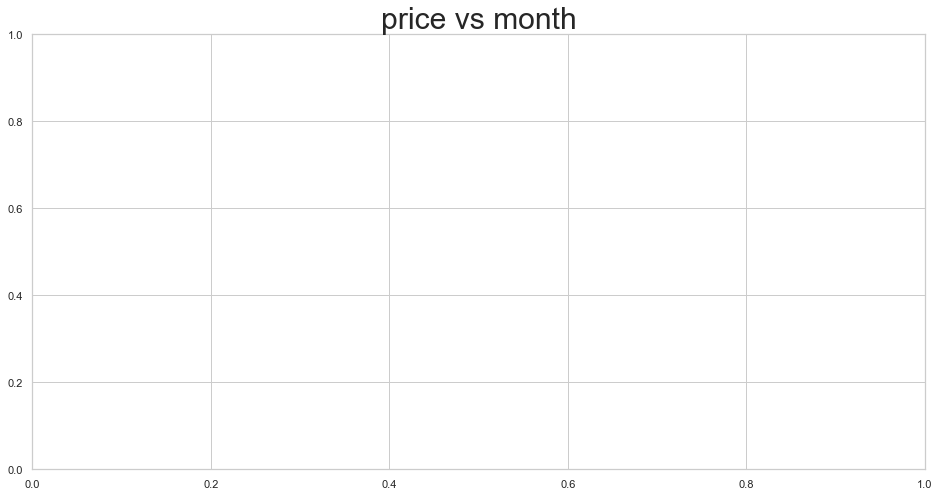

In [17]:
sns.set(style="whitegrid")
#housing = sns.load_dataset("tips")
bar_list=['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'month','season', 'zipcode']

for col in bar_list:
    plt.figure(figsize=(16,8))
    plt.title('price vs '+col,fontsize=30)
    ax = sns.barplot(x=col, y="price", data=tmp_kc, ci="sd", capsize=0.2)
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("price", fontsize=20)
    if col == 'zipcode' or col == 'yr_built':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.savefig('img/'+col+'.png') # Save that figure
    plt.show()
    

## All data is validated and ready for further analysis
Save the clean data to a kc_house_data_clean.csv file

In [ ]:
#print(result)
kc_final = kc_final[result]

In [ ]:
kc_final.to_csv('data/kc_house_data_validated.csv', index=False)

<p style="font-size:200%; text-align:center">Please open analysis.ipynb next for further analysis</p>